# Fashion MNIST with Python Keras and Deep Learning

![image.png](attachment:image.png)

In [ ]:
# tensorflow is developed by google
# tensorflow language is always based on tensors
# list ====== array === tensors (vector representation)
# writing only tensorflow code is little bit tricky
# so we use keras as backend of tensarflow

# 1.Import Python modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [ ]:
print(tf.__version__)

2.15.0


# 2. Load Dataset

In [ ]:
(x_train, y_train), (x_test, y_test)= keras.datasets.fashion_mnist.load_data()
print("train data length:",len(x_train))
print("test data length:",len(x_test))

4422102/4422102 [==============================] - 0s 0us/step
train data length: 60000
test data length: 10000


In [ ]:
x_train.shape, y_train.shape
# 60k images
# each image shape 28*28 = 784 pixel values

((60000, 28, 28), (60000,))

In [ ]:
x_train[0]
# there are 28 list will be available
# in each list 28 values will be available
# the shape will become  28*28

x_train[0].shape

(28, 28)

In [ ]:
len(x_train[1]) # second image

28

# 3. Pre-Processing

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', ' sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

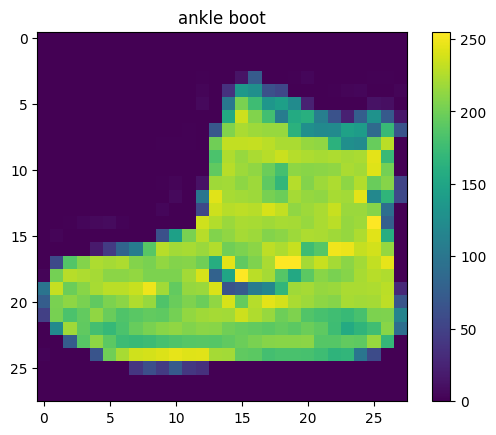

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.title(class_names[y_train[0]])
plt.colorbar()
plt.show()

# yellow=255

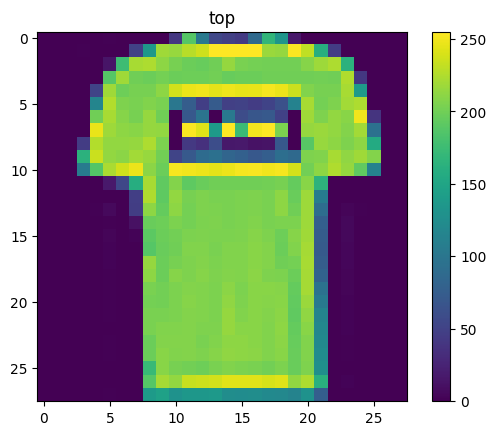

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.title(class_names[y_train[1]])
plt.colorbar()
plt.show()

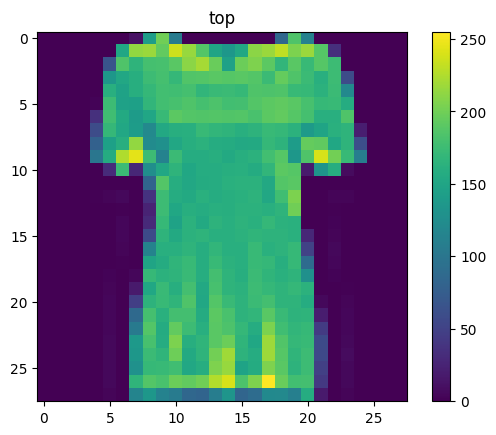

In [ ]:
plt.figure()
plt.imshow(x_train[10])
plt.title(class_names[y_train[10]])
plt.colorbar()
plt.show()

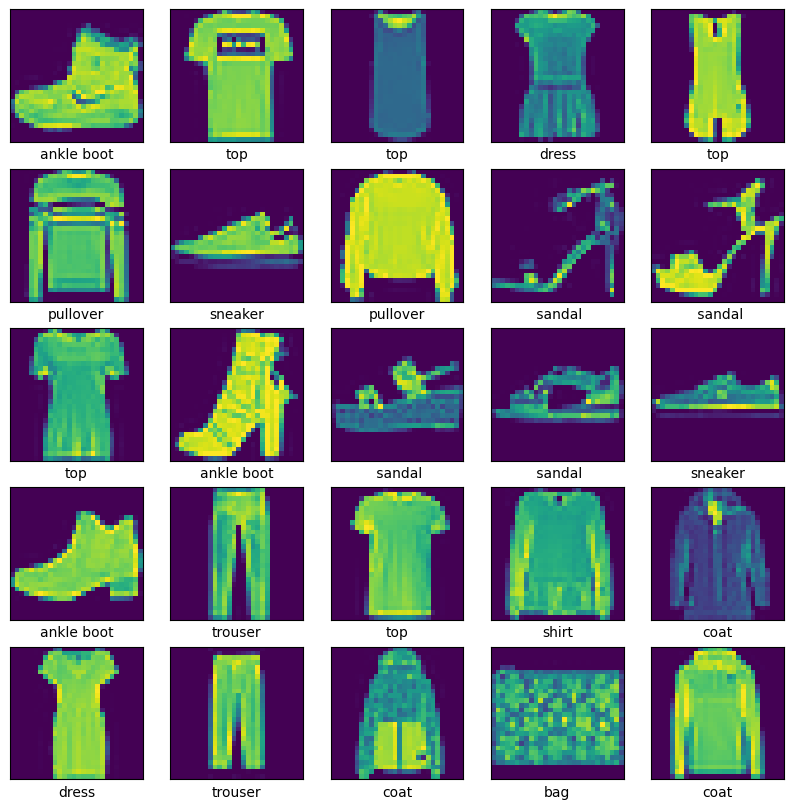

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):   # 25 images
  plt.subplot(5,5,i+1) # 25 plots i=2 5,5,2
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

# 4. Scaling

range between 0 t 1
 neural network model doesnt take valueb  more than 1
 soe we need to bring all the values between 0 nd 1

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# now we can see all the between 0 to 1

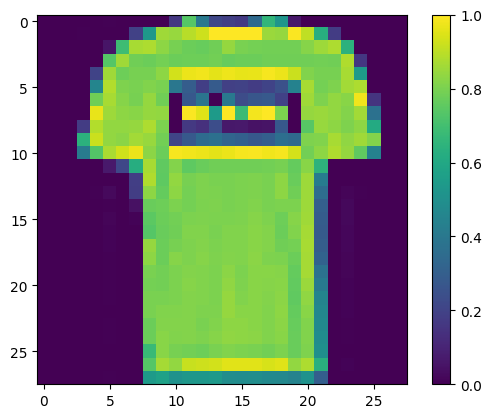

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.show()

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

# 5. Model

**Build the model with TF 2.0**

- Step 1 — Build the architecture
- Step 2 — Compile the model
- Step 3 — Train the model
- Step 4 — Evaluating the model

In [ ]:
model = Sequential()
# input layer   starst flatten 28*25 ==== 1-d

model.add(Flatten(input_shape = (28, 28)))  # 28*28=784 inputs


# one hidden layer
# how many neurons wants to use : 128
# which activation function u want to use : ';relu'
# bcz it avoids vanish gradient problem

model.add(Dense(128, activation = 'relu'))  # 128 : 784*128+128(1bias)

# output layer
# how many class are there = 10
# how many neurons : 10
# activation : softmax

model.add(Dense(10, activation = 'softmax'))  # 128 is attached with 10 neurons

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 6. Compile the model

In [ ]:
from re import VERBOSE
# now we now how many weights we need to update
# to find the weights we have optimizer

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 7. Model fit

In [ ]:
model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=64,
          verbose = True)

# by default verbose=true ====== it will display the inf
#            verbose=false ====== it will not display info

# epoch = forward + backward

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.5248 - accuracy: 0.8170
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.3863 - accuracy: 0.8632
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3481 - accuracy: 0.8745
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3228 - accuracy: 0.8833
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3052 - accuracy: 0.8882
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2910 - accuracy: 0.8931
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2771 - accuracy: 0.8973
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2683 - accuracy: 0.9006
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2553 - accuracy: 0.9056
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2479 - accuracy: 0.90

# 8. Model Evaluation

now we will evaluate teh accuracy using the test data. we have got an accuracy of 87.82%

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8826
0.8826000094413757


# By default tensorflow is a minibatch gradient descent

# 9. Model Predictions

In [ ]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[6.9375369e-07, 4.9290536e-09, 8.6411816e-08, ..., 1.3437446e-02,
        1.2225935e-05, 9.8248327e-01],
       [1.5402470e-03, 1.2415614e-11, 9.9684256e-01, ..., 2.2113157e-13,
        2.5752371e-08, 8.8808304e-15],
       [2.0509276e-07, 9.9999970e-01, 1.4039605e-09, ..., 1.0488946e-15,
        4.6330695e-12, 3.3229945e-15],
       ...,
       [2.1311434e-04, 3.6652154e-10, 9.5993229e-05, ..., 3.6162774e-08,
        9.9880785e-01, 5.4886817e-10],
       [1.1713916e-05, 9.9993461e-01, 3.7066550e-07, ..., 2.0915094e-11,
        7.3736764e-08, 5.1679901e-08],
       [2.2427897e-05, 7.9618999e-08, 3.0528565e-05, ..., 2.8622593e-03,
        1.2066449e-03, 2.5800691e-05]], dtype=float32)

# 10. Model Prediction -unseen data (cv2)

In [ ]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', ' sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

import cv2
gray_image = cv2.imread("dress.jpg", cv2.IMREAD_GRAYSCALE)
print(gray_image.shape) # (height,width,channels)

image_scaled = cv2.resize(gray_image, (28, 28)) # (width,height)
print(image_scaled.shape)

image_scaled = image_scaled.astype('float32')
image_scaled=image_scaled/255.0

# Reshape the image to match the model input shape
image_scaled_final = np.expand_dims(image_scaled, axis=0)

predict_value = model.predict(image_scaled_final)
value = np.argmax(predict_value)
print("predicted calss:",value)
print("predicted class:", class_names[value])


(275, 183)
(28, 28)
1/1 [==============================] - 0s 103ms/step
predicted calss: 8
predicted class: bag


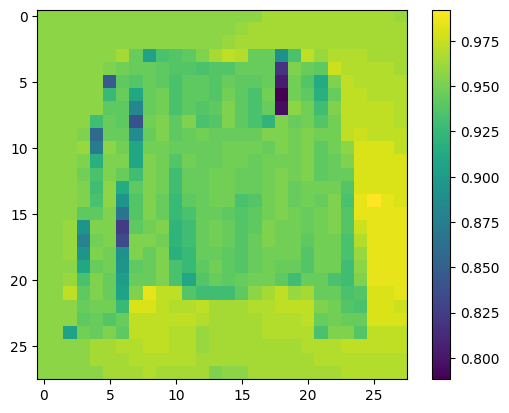

In [ ]:
plt.figure()
plt.imshow(image_scaled)
plt.colorbar()
plt.show()

# 11. Model Prediction -unseen data (Pillow)

In [ ]:
from PIL import Image
import numpy as np

class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

image_path = "bag.jpeg"
gray_image = Image.open(image_path).convert('L')
gray_array = np.array(gray_image)

print("Original image shape:", gray_array.shape) # (height,width)

image_resized = gray_image.resize((28, 28))
image_scaled = np.array(image_resized)


print("Resized image shape:", image_scaled.shape) # (height,width)

# Convert image to float32 and normalize
image_scaled = image_scaled.astype('float32') / 255.0

# Reshape the image to match the model input shape
image_scaled_final = np.expand_dims(image_scaled, axis=0)

# Make prediction using the model
predict_value = model.predict(image_scaled_final)

# Get the index of the class with the highest probability
value = np.argmax(predict_value)

print("Predicted class:", class_names[value])


Original image shape: (2160, 1911)
Resized image shape: (28, 28)
1/1 [==============================] - 0s 29ms/step
Predicted class: bag


In [ ]:
print(image_scaled.shape)
print(image_scaled_final.shape)

(28, 28)
(1, 28, 28)


In [ ]:
image_scaled_final.shape

(1, 28, 28)

In [ ]:
model.save("fashion-ann.h5")